# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [8]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [9]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

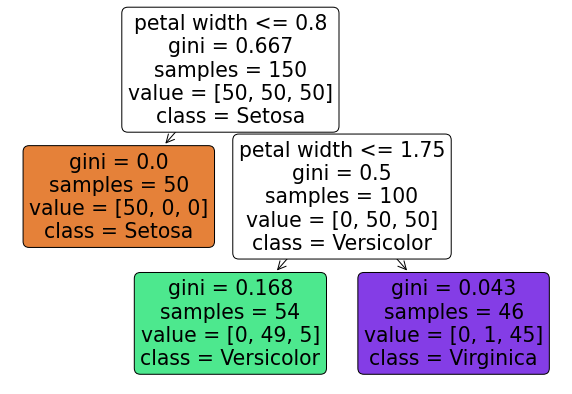

In [10]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

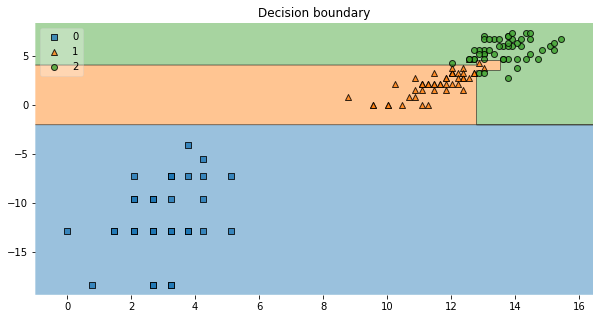

In [11]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

### Zadanie 2

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

<ipython-input-247-9aed63bea28f>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[[x1, x2]] = StandardScaler().fit_transform(data[[x1, x2]])
/home/rgegotek/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


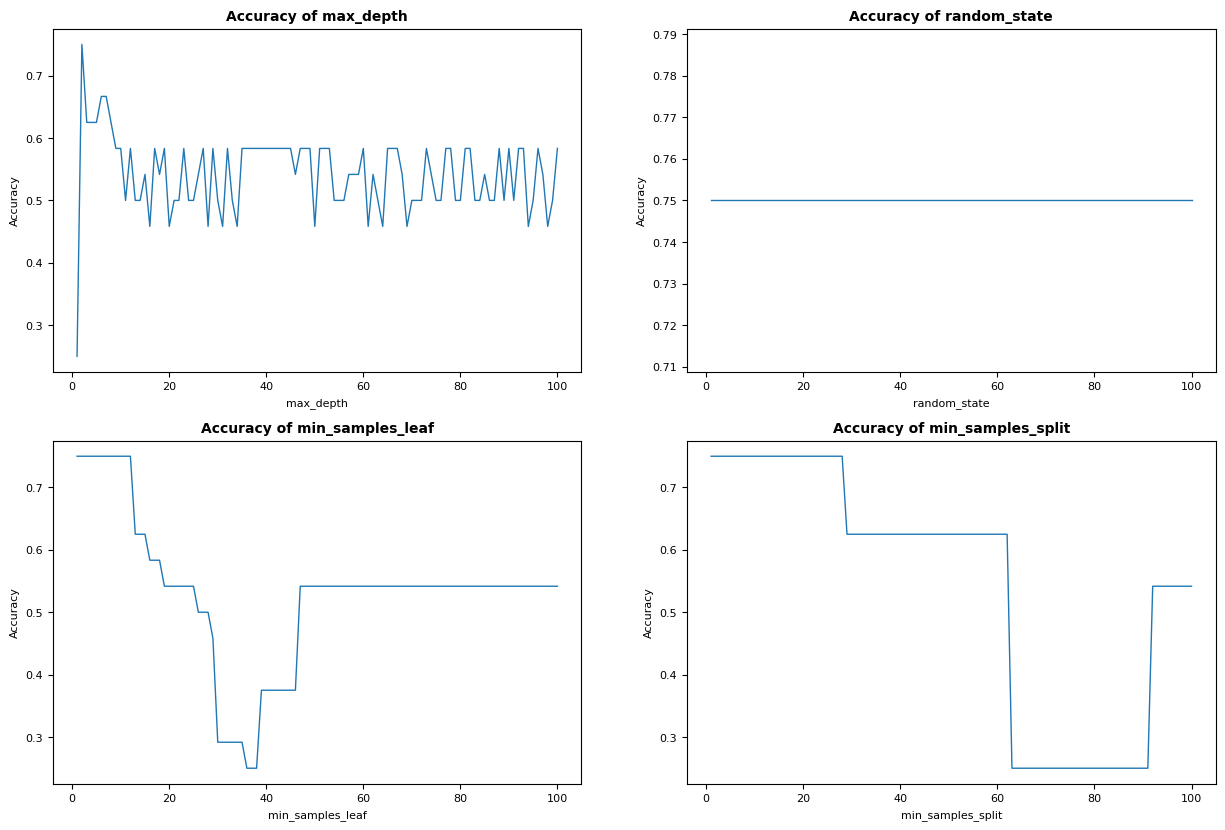

Summary: Accuracy for parameter
*each subsequent one has the best setting for the previous one +-----+-----------+--------------+------------------+-------------------+
|  %  | max_depth | random_state | min_samples_leaf | min_samples_split |
+-----+-----------+--------------+------------------+-------------------+
|  1  |    0.25   |     0.75     |       0.75       |        0.75       |
|  2  |    0.75   |     0.75     |       0.75       |        0.75       |
|  3  |   0.625   |     0.75     |       0.75       |        0.75       |
|  4  |   0.625   |     0.75     |       0.75       |        0.75       |
|  5  |   0.625   |     0.75     |       0.75       |        0.75       |
|  6  |  0.66667  |     0.75     |       0.75       |        0.75       |
|  7  |  0.66667  |     0.75     |       0.75       |        0.75       |
|  8  |   0.625   |     0.75     |       0.75       |        0.75       |
|  9  |  0.58333  |     0.75     |       0.75       |        0.75       |
|  10 |  0.58333 

In [247]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
from prettytable import PrettyTable

def draw_plot(ax, x, value, xlabel):
    ax.plot(x, value, linewidth=1)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel('Accuracy', fontsize=8)
    ax.set_title("Accuracy of "+xlabel, fontsize=10, fontweight='bold')

def generate_plots(x, max_depth, random_state, min_samples_leaf, min_samples_split):
    plt.figure(figsize=(15, 10), dpi=100)
    plt.rcParams.update({'font.size': 8})
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(223)
    ax4 = plt.subplot(224)
    draw_plot(ax1, x, max_depth, "max_depth")
    draw_plot(ax2, x, random_state, "random_state")
    draw_plot(ax3, x, min_samples_leaf, "min_samples_leaf")
    draw_plot(ax4, x, min_samples_split, "min_samples_split")
    plt.show()
    
def train_predict(max_depth = 10, random_state=None, min_samples_leaf=1, min_samples_split=2):
    tree = DecisionTreeClassifier(
        criterion = "entropy", 
        max_depth = max_depth, 
        random_state = random_state, 
        min_samples_leaf = min_samples_leaf,
        min_samples_split = min_samples_split
    )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_sc = metrics.accuracy_score(y_test, y_pred)
    return acc_sc
    
x1 = 'BMI'
x2 = 'Adiponectin'
df = pd.read_csv('./datasets/Breast.csv')
data = df[[x1, x2, 'Classification']]
data[[x1, x2]] = StandardScaler().fit_transform(data[[x1, x2]])
X_train, X_test, y_train, y_test = train_test_split(data[[x1, x2]], df['Classification'], test_size=0.2, random_state=0)
 
x = list(range(1, 101))
y_max_depth = [train_predict(max_depth = i) for i in x ]
y_random_state = [train_predict(max_depth = (y_max_depth.index(max(y_max_depth))+1),
                                random_state = i) for i in x ]
y_min_samples_leaf = [train_predict(max_depth = (y_max_depth.index(max(y_max_depth))+1),
                                    random_state = (y_random_state.index(max(y_random_state))+1),
                                    min_samples_leaf = i) for i in x ]
y_min_samples_split = [train_predict(max_depth = (y_max_depth.index(max(y_max_depth))+1),
                                     random_state = (y_random_state.index(max(y_random_state))+1),
                                     min_samples_leaf = (y_min_samples_leaf.index(max(y_min_samples_leaf))+1),                                 
                                     min_samples_split = (i+1)) for i in x ]

generate_plots(x, y_max_depth, y_random_state, y_min_samples_leaf, y_min_samples_split)
table = PrettyTable(['%', 'max_depth', 'random_state', 'min_samples_leaf', 'min_samples_split' ])      
for i, j, k, l, m, in zip(x, y_max_depth, y_random_state, y_min_samples_leaf, y_min_samples_split):
    table.add_row([round(i,5), round(j,5), round(k,5), round(l,5), round(m,5)])
print("Summary: Accuracy for parameter\n*each subsequent one has the best setting for the previous one",table)

Dla zastosowanych tanych tj: BMI oraz Adiponectin, zmiana parametrów wplywała na wynik klasyfikacji w sposób jaki zostal przedstawiony na wykresach i tabeli. Mianowicie
- max_depth osiągnoł największa wartość dla iteracji nr. 2 (0.75), następnie wraz ze wzrostem tego parametru mała skutecznośći i oscylowała w granicy 0.4 do 0.6
- random_state wraz z ustawieniem max_depth na wartość dla jakiej osiągnol swoje maksimum, nie zminiał swjej wartości, będąc stale równy 0.75
- min_samples_leaf wraz z zastosowaniem poprzednich parametrow na maksymalnie osiagniete wartości, osiągnol swoje maksimum na początku iteracji (0.75), następnie stoponiowo jego wartość spadała do 40 iteracji (025), a następnie ustabilizowała się na wartości 0.55
- min_sampes_split, również osiągnol najlepszą wartość na początku (0.75), a nastepnie skteczność sie pogarszała, az do 0.25 i ustabilizowała sie na poziomie 0.55

### Zadanie 3

Drzewa decyzyjne mogą również szacować prawdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [249]:
tree = DecisionTreeClassifier(splitter='random', criterion="entropy", max_depth=5)  
tree.fit(X_train, y_train)
tree.predict_proba(X_test)[:, 1]

array([0.4       , 0.4       , 0.51219512, 0.6       , 1.        ,
       0.51219512, 0.51219512, 0.51219512, 0.25      , 0.51219512,
       0.25      , 0.66666667, 0.51219512, 0.51219512, 1.        ,
       0.51219512, 0.6       , 0.4       , 0.51219512, 0.51219512,
       1.        , 1.        , 0.25      , 0.6       ])

In [250]:
tree = DecisionTreeClassifier(splitter='best', criterion="entropy", max_depth=10)  
tree.fit(X_train, y_train)
tree.predict_proba(X_test)[:, 1]

array([1.    , 1.    , 0.    , 0.    , 1.    , 0.6875, 0.6875, 0.6875,
       0.    , 0.    , 1.    , 0.    , 1.    , 0.    , 1.    , 0.6875,
       0.    , 0.    , 0.6875, 1.    , 1.    , 1.    , 0.    , 1.    ])

In [255]:
tree = DecisionTreeClassifier(splitter='best', criterion="entropy", max_depth=20, random_state=50, min_samples_leaf=1, min_samples_split=2)  
tree.fit(X_train, y_train)
tree.predict_proba(X_test)[:, 1]

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1.])

### Zadanie 4

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

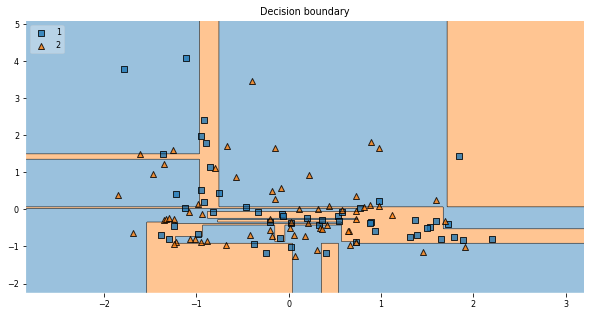

In [256]:
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=data[[x1, x2]].to_numpy(), y=df['Classification'].to_numpy(), clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Dla znalezienie optymalnych parametrów algorytm drzewa decyzyjnego może poradzić sobie w dobrym stopniu z problemem klasyfikacji, tak jak pokazuje to powyższy przykład. W tym przypadku dla ustawień:
- max_depth=20, 
- random_state=50 (*tutaj dowolna wartość, gdyż parametrów bardzo słabo wplywał na zmiane skteczności)
- min_samples_leaf=1,
- min_samples_split=2

Oczywiście można doszukać się wartości źle sklasyfikowanych, jednakże biorąc pod uwagę charakter zastosowanych danych, można stwierdzić, że algorytm w bardzo dobrym stopniu poradził sobie z tym problemem klasyfikacji.